# Extract data from MindBody Completed Class Account Page for Analysis

### Objective
1. Harvest the workout class activitiy from my account page on Mindbody.com
2. Use BeautifulSoup to extract the interesting data.
3. Write to the data do a csv for reporting and analysis. 

**Challenges**
- Mindbody is behind authentication
- The HTML is not well structured

Author - Rod Morrison

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

Ingest the file


In [2]:
mhtml_file= 'data/Mindbody.htm'

with open(mhtml_file, 'r', encoding='utf-8') as f:
    html = f.read()
    
soup = BeautifulSoup(html, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0055)https://www.mindbodyonline.com/explore/account/schedule -->
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="A/kargTFyk8MR5ueravczef/wIlTkbVk1qXQesp39nV+xNECPdLBVeYffxrM8TmZT6RArWGQVCJ0LRivD7glcAUAAACQeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IkRpc2FibGVUaGlyZFBhcnR5U3RvcmFnZVBhcnRpdGlvbmluZzIiLCJleHBpcnkiOjE3NDIzNDIzOTksImlzU3ViZG9tYWluIjp0cnVlLCJpc1RoaXJkUGFydHkiOnRydWV9" http-equiv="origin-trial"/>
  <script src="./full_Account _ Mindbody_files/169e250927" type="text/javascript">
  </script>
  <script src="./full_Account _ Mindbody_files/nr-spa-1208.min.js">
  </script>
  <script async="" charset="utf-8" crossorigin="anonymous" integrity="sha384-8mJgBUBw4uTWF9Ooxgb4sUuO9jKtaVm1I+8vb0qpxxX3cafec7ovH+goM3yD4UyO" src="./full_Account _ Mindbody_files/recaptcha__en.js" type="text/javascript">
  </script>
  <script async="" src="./full_Account _ Mindbody_files/mixpan

In [3]:
clean_mb = soup.prettify()

with open('data/clean_mb.html', 'w', encoding='utf-8') as f:
    f.write(clean_mb)


Ingest the cleaned data

In [4]:
with open('data/clean_mb.html', 'r', encoding='utf-8') as f:
    html = f.read()
    
soup = BeautifulSoup(html, 'html.parser')
print(soup.title)


<title>
   Account | Mindbody
  </title>


Write File to CSV

### EDA and Data Prep

---

#### Key Challenges
1. **Inconsistent Data Structure**:
   - Elements like dates and times may be missing or structured differently, leading to misalignment in the extracted data.
   - This caused my data from being consistent in the dataframe. 
2. **Dynamic Content**:
   - If the HTML contains JavaScript-rendered content, static parsing may miss certain elements.
3. **Data Alignment**:
   - Extracted lists for different attributes (e.g., dates, categories) have mismatched lengths.

---

## Solution

### Step 1: Identify the Parent Container
- The workout schedule data is encapsulated in containers identified by the class `UserScheduleItem_wrapper__8PXfi`.
- Each container holds all relevant data (e.g., dates, times, categories, locations).

### Step 2: Iterative Parsing
- Iterate through each container and extract the following:
  - **Date (`day`)**: Extracted from `UserScheduleItemDate_day__1DJZ_`.
  - **Month and Year (`month_year`)**: Extracted from `UserScheduleItemDate_month__1Vlt2`.
  - **Category (`category`)**: Extracted from `CategoryTag_category__3BsVp`.
  - **Class Name (`class_name`)**: Extracted from `UserScheduleItemDetails_headerLink__1UVuC`.
  - **Location (`location`)**: Extracted from `UserScheduleItemDetails_link__u4Ftd`.
  - **Start Time (`time_of_day`)**: Extracted from `UserScheduleItemTime_start__1M87Z`.
  - **Duration (`duration`)**: Extracted from `UserScheduleItemTime_end__2Ykw-`.

### Step 3: Handle Missing Data Gracefully
- Use `.find()` and conditional checks to avoid errors for missing elements.
- Append `None` for any missing data to maintain alignment.

### Step 4: Create a DataFrame
- Compile the extracted data into a Pandas DataFrame for easy manipulation and analysis.
- Ensure alignment across all attributes by processing each container independently.

### Step 5: Save to CSV
- Save the final DataFrame to a CSV file for further analysis or reporting.

---



In [28]:
# Load the cleaned HTML file
html_file_path = "data/clean_mb.html"  # Replace with the correct file path

with open(html_file_path, "r", encoding="utf-8") as file:
    html_data = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Extract all 'UserScheduleItem_wrapper__8PXfi' containers
schedule_items = soup.find_all('div', class_='UserScheduleItem_wrapper__8PXfi')

# Parse data from each schedule item container
parsed_data = []
for item in schedule_items:
    day = item.find('div', class_='UserScheduleItemDate_day__1DJZ_')
    month_year = item.find('div', class_='UserScheduleItemDate_month__1Vlt2')
    category = item.find('span', class_='CategoryTag_category__3BsVp')
    class_name = item.find('span', class_='UserScheduleItemDetails_headerLink__1UVuC')
    location = item.find('span', class_='UserScheduleItemDetails_link__u4Ftd')
    time_of_day = item.find('h5', class_='UserScheduleItemTime_start__1M87Z')
    duration = item.find('div', class_='UserScheduleItemTime_end__2Ykw-')
    
    # Add parsed data to the list
    parsed_data.append({
        'day': day.get_text(strip=True) if day else None,
        'month_year': month_year.get_text(strip=True) if month_year else None,
        'category': category.get_text(strip=True) if category else None,
        'class_name': class_name.get_text(strip=True) if class_name else None,
        'location': location.get_text(strip=True) if location else None,
        'time_of_day': time_of_day.get_text(strip=True) if time_of_day else None,
        'duration': duration.get_text(strip=True) if duration else None,
    })

# Convert the parsed data to a DataFrame
df = pd.DataFrame(parsed_data)

# Save the DataFrame to a CSV file
output_file_path = "data/workout_schedule.csv"  # Replace with the desired output path
df.to_csv(output_file_path, index=False)

print(f"Cleaned workout schedule data saved to: {output_file_path}")


Cleaned workout schedule data saved to: data/workout_schedule.csv


In [29]:
df.head()

day     month_year      category            class_name  \
0  13  January, 2025  Martial arts      Fighting Mastery   
1  13  January, 2025  Martial arts  Fighting Foundations   
2  11  January, 2025  Martial arts              Sparring   
3  08  January, 2025  Martial arts      Fighting Mastery   
4  08  January, 2025  Martial arts  Fighting Foundations   

                                  location time_of_day  duration  
0  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm  (30 min)  
1  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am  (60 min)  
2  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am  (60 min)  
3  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm  (30 min)  
4  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am  (60 min)

In [30]:
df.describe()

day     month_year      category            class_name  \
count   1238           1238          1238                  1213   
unique    31             98             4                    18   
top       06  January, 2021  Martial arts  Fighting Foundations   
freq      54             29           935                   511   

                                       location time_of_day  duration  
count                                      1238        1238      1238  
unique                                        7          24         5  
top     Cantu's Self-Defense, LLC. w/ Roy Cantu      5:30am  (60 min)  
freq                                        967         427      1024

In [31]:
# Split the month_year column into separate month and year columns
df[['month', 'year']] = df['month_year'].str.split(', ', expand=True)

# Strip leading and trailing whitespaces from month and year columns
df['month'] = df['month'].str.strip()
df['year'] = df['year'].str.strip()

# Strip the parentheses from the duration column
df['duration'] = df['duration'].str.strip('()')
df['duration'] = df['duration'].str.replace(' min', '')

# Convert the day column to numeric
df['day'] = pd.to_numeric(df['day'], errors='coerce')

# Drop the month_year column
df.drop(columns=['month_year'], inplace=True)

# Rearrange the columns to the desired order
columns_order = ['day', 'month', 'year', 'class_name', 'location', 'time_of_day', 'duration']
df = df[columns_order]


# Save the DataFrame to a CSV file
output_file_path = "data/workout_history.csv"  # Replace with the desired output path
df.to_csv(output_file_path, index=False)

print(f"Updated DataFrame saved to {output_file_path}")

Updated DataFrame saved to data/workout_history.csv


In [32]:
df_updated = pd.read_csv(output_file_path)
df_updated.head()

day    month  year            class_name  \
0   13  January  2025      Fighting Mastery   
1   13  January  2025  Fighting Foundations   
2   11  January  2025              Sparring   
3    8  January  2025      Fighting Mastery   
4    8  January  2025  Fighting Foundations   

                                  location time_of_day  duration  
0  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
1  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60  
2  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am        60  
3  Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
4  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60

In [33]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          1238 non-null   int64 
 1   month        1238 non-null   object
 2   year         1238 non-null   int64 
 3   class_name   1213 non-null   object
 4   location     1238 non-null   object
 5   time_of_day  1238 non-null   object
 6   duration     1238 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 67.8+ KB


In [35]:
df_updated.isna().sum()

day             0
month           0
year            0
class_name     25
location        0
time_of_day     0
duration        0
dtype: int64

In [36]:
# Fill missing values in the class_name column
df['class_name'] = df['class_name'].fillna('Unknown')

In [37]:
df.isna().sum()

day            0
month          0
year           0
class_name     0
location       0
time_of_day    0
duration       0
dtype: int64

In [38]:
# Save the updated DataFrame to a new CSV file
output_file_path = "data/workout_history_cleaned.csv"
df_updated.to_csv(output_file_path, index=False)

print(f"Updated DataFrame saved to {output_file_path}")

Updated DataFrame saved to data/workout_history_cleaned.csv


In [39]:
df_updated

day     month  year            class_name  \
0      13   January  2025      Fighting Mastery   
1      13   January  2025  Fighting Foundations   
2      11   January  2025              Sparring   
3       8   January  2025      Fighting Mastery   
4       8   January  2025  Fighting Foundations   
...   ...       ...   ...                   ...   
1233   11   January  2017    Adult Fundamentals   
1234    9   January  2017    Adult Fundamentals   
1235    7   January  2017            Adult Spar   
1236    4   January  2017    Adult Fundamentals   
1237   17  December  2016            Adult Spar   

                                     location time_of_day  duration  
0     Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
1     Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60  
2     Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am        60  
3     Cantu's Self-Defense, LLC. w/ Roy Cantu     12:30pm        30  
4     Cantu's Self-Defense, LLC. w/ Roy Cantu     11:30am        60  
...                                       ...         ...       ...  
1233  Cantu's Self-Defense, LLC. w/ Roy Cantu      5:30am        60  
1234  Cantu's Self-Defense, LLC. w/ Roy Cantu      5:30am        60  
1235  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am        60  
1236  Cantu's Self-Defense, LLC. w/ Roy Cantu      5:30am        60  
1237  Cantu's Self-Defense, LLC. w/ Roy Cantu     11:00am        60  

[1238 rows x 7 columns]

**Reporting**

/var/folders/gs/_wm7z6_n2cg0_skqwsmkvhjm0000gn/T/ipykernel_75191/3566668950.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_per_year.index, y=class_counts_per_year.values, palette='viridis')


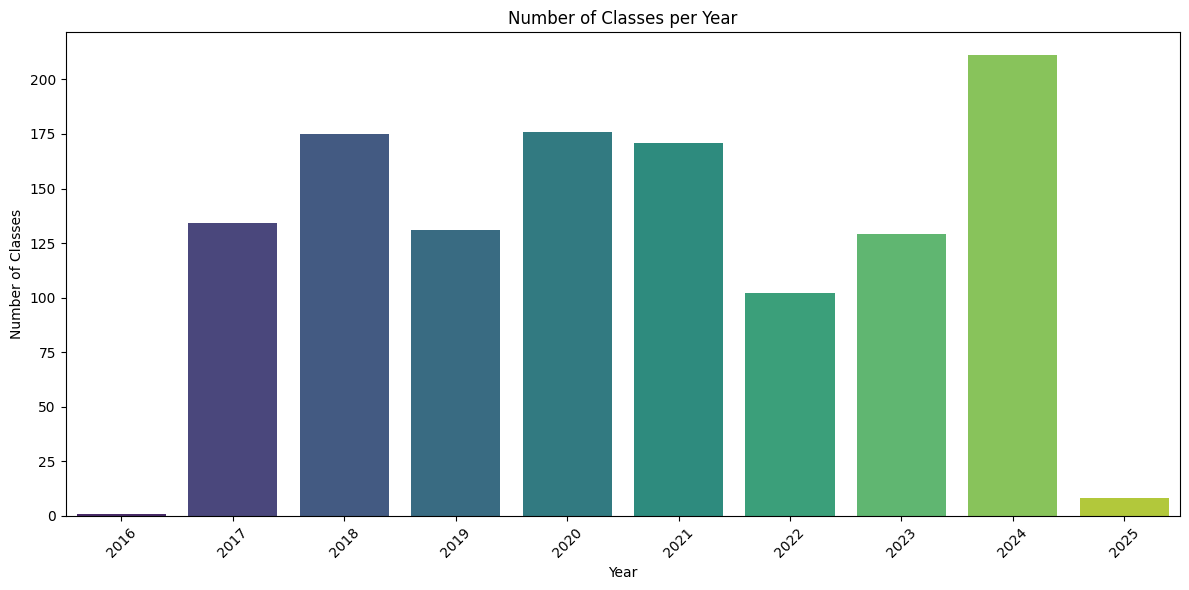

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
file_path = "data/workout_history_cleaned.csv"
df = pd.read_csv(file_path)

# Ensure 'time_of_day' is parsed as a string and replace 'NaT' with 'Unknown'
df['time_of_day'] = df['time_of_day'].astype(str).replace('NaT', 'Unknown')

# Ensure 'duration' is parsed as a string and strip any parentheses
df['duration'] = df['duration'].astype(str).str.strip('()')

# Convert 'month' and 'year' to strings
df['month'] = df['month'].astype(str)
df['year'] = df['year'].astype(str)

# Rearrange the columns to the desired order
columns_order = ['day', 'month', 'year', 'class_name', 'location', 'time_of_day', 'duration']
df = df[columns_order]

# Display the DataFrame
df.head()

# Create a Seaborn bar chart for the number of classes per year
class_counts_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts_per_year.index, y=class_counts_per_year.values, palette='viridis')
plt.title('Number of Workout Classes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()